In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [605]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [523]:
import matplotlib.style as style

In [524]:
df = pd.read_csv('result_data_2.0.csv',index_col=0)

In [525]:
df.shape

(519, 113)

In [526]:
X = df.loc[:,[
 'Yrs',
 'GP',
 'MPG',
 'FG_Perc',
 '3P_Perc',
 'FT_Perc',
 'APG',
 'SPG',
 'BPG',
 'PPG',
 'Duke University',
 'Georgia Institute of Technology',
 'Indiana University',
 'Louisiana State University',
 'Ohio State University',
 'Stanford University',
 'Syracuse University',
 'University of Kentucky',
 'University of Memphis',
 'University of Southern California',
 'Total_Height_in',
 'PPG_top3',
 'PPG_top5',
 'PPG_top7',
 'PPG_top13',
 'top3/top5',
 'top3/top7',
 'top3/top13',
 'top5/top7',
 'top5/top13',
 'top7/top13']]

y = df['PTS']

# Standardize Data

In [527]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [528]:
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [529]:
X_tr = std.transform(X_train)
X_te = std.transform(X_test)

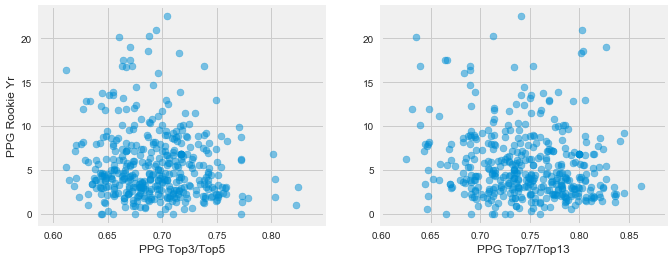

In [530]:
fig, ax = plt.subplots(1,2,figsize=(10,4))

ax[0].scatter(X_train['top3/top5'],y_train, alpha = .5)
ax[0].set_xlabel('PPG Top3/Top5')
ax[0].set_ylabel('PPG Rookie Yr')

ax[1].scatter(X_train['top7/top13'],y_train, alpha = .5)
ax[1].set_xlabel('PPG Top7/Top13')

# Multiple Linear Regression

In [531]:
lr_model1 = LinearRegression()
lr_model1.fit(X_tr,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [532]:
list(zip(X_train.columns,lr_model1.coef_))

[('Yrs', -0.012615236364467016),
 ('GP', 0.20093237380296336),
 ('MPG', -0.81976992002779114),
 ('FG_Perc', 0.5435788987952167),
 ('3P_Perc', 0.18124506158306475),
 ('FT_Perc', 0.061755210015261852),
 ('APG', 1.2437466029396114),
 ('SPG', 0.60134679853041828),
 ('BPG', 0.10442238823197925),
 ('PPG', 1.3568893320822584),
 ('Duke University', 0.26471141685146016),
 ('Georgia Institute of Technology', 0.15073523159619601),
 ('Indiana University', 0.43690357229443921),
 ('Louisiana State University', 0.10589647476910688),
 ('Ohio State University', 0.14432611424671415),
 ('Stanford University', 0.48803119294472819),
 ('Syracuse University', 0.47401577202238016),
 ('University of Kentucky', 0.58323982320735024),
 ('University of Memphis', 0.0091073048545513291),
 ('University of Southern California', 0.45275020055984266),
 ('Total_Height_in', 0.46045546238503232),
 ('PPG_top3', 7.9023135363661519),
 ('PPG_top5', -10.129400568309659),
 ('PPG_top7', -1.557637644663288),
 ('PPG_top13', 6.27788

In [533]:
lr_test_pred1 = lr_model1.predict(X_te)

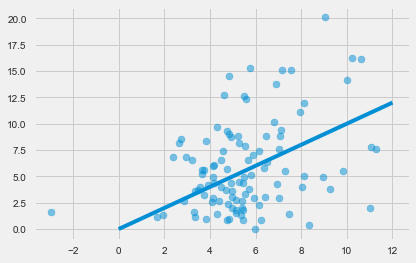

In [596]:
## Plot predicted vs actual 

plt.scatter(lr_test_pred1,y_test,alpha=0.5)
plt.plot(np.linspace(0,12,1000),np.linspace(0,12,1000))

In [535]:
print('LinReg MAD: ',np.mean(np.abs(lr_test_pred1 - y_test)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred1)))
print('LinReg MSE: ', mean_absolute_error(y_test,lr_test_pred1))
print('LinReg r2: ',r2_score(y_test, lr_test_pred1))

LinReg MAD:  3.2521702580196843
LinReg RMSE:  4.02173875643
LinReg MSE:  3.25217025802
LinReg r2:  0.0962422054315


# LassoCV

In [536]:
alphavec = 10**np.linspace(-3,9,27)

In [537]:
lr_model2 = LassoCV(alphas = alphavec, cv=5)
lr_model2.fit(X_tr,y_train)

print('alpha: ',lr_model2.alpha_)
print('cv: ',lr_model2.cv)

alpha:  0.070170382867
cv:  5


/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [538]:
lr_model3 = Lasso(alpha=0.1)
lr_model3.fit(X_tr,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [539]:
list(zip(X_train.columns,lr_model3.coef_))

[('Yrs', -0.090642158839793624),
 ('GP', 0.19253829415003601),
 ('MPG', -0.17863071423267043),
 ('FG_Perc', 0.42681818974925179),
 ('3P_Perc', 0.0),
 ('FT_Perc', 0.0035232463916359228),
 ('APG', 0.56467012161665719),
 ('SPG', 0.38204215959609039),
 ('BPG', 0.048175822856854962),
 ('PPG', 0.99977186316989775),
 ('Duke University', 0.11592759232632072),
 ('Georgia Institute of Technology', 0.07409118018681389),
 ('Indiana University', 0.27153327196489774),
 ('Louisiana State University', 0.0),
 ('Ohio State University', 0.10518606219754439),
 ('Stanford University', 0.27167721630354141),
 ('Syracuse University', 0.35853537538232794),
 ('University of Kentucky', 0.42577296406008119),
 ('University of Memphis', 0.0),
 ('University of Southern California', 0.30308923554262918),
 ('Total_Height_in', 0.0),
 ('PPG_top3', -0.078244680406691941),
 ('PPG_top5', -0.0),
 ('PPG_top7', -0.0),
 ('PPG_top13', 0.0),
 ('top3/top5', -0.060432264332225108),
 ('top3/top7', -0.0),
 ('top3/top13', -0.0),
 ('t

In [540]:
lr_test_pred2 = lr_model3.predict(X_te)

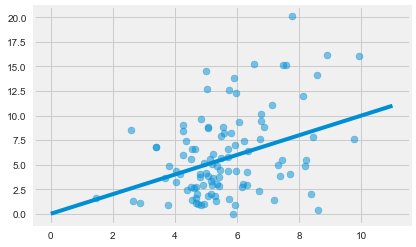

In [541]:
## Plot predicted vs actual 

plt.scatter(lr_test_pred2,y_test,alpha=0.5)
plt.plot(np.linspace(0,11,1000),np.linspace(0,11,1000))

In [542]:
print('LassoReg MAD: ',np.mean(np.abs(lr_test_pred2 - y_test)))
print('LassoReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred2)))
print('LassoReg MSE: ', mean_absolute_error(y_test,lr_test_pred2))
print('LassoReg r2: ',r2_score(y_test, lr_test_pred2))

LassoReg MAD:  3.1024060888752087
LassoReg RMSE:  3.88804133701
LassoReg MSE:  3.10240608888
LassoReg r2:  0.155331904406


# Ridge

In [543]:
lr_model3 = RidgeCV(alphas = alphavec, cv=5)
lr_model3.fit(X_tr,y_train)

print('alpha: ',lr_model3.alpha_)
print('cv: ',lr_model3.cv)

alpha:  119.377664171
cv:  5


In [544]:
lr_model4 = Ridge(alpha=lr_model3.alpha_)
lr_model4.fit(X_tr,y_train)

Ridge(alpha=119.37766417144383, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [545]:
list(zip(X_train.columns,lr_model4.coef_))

[('Yrs', -0.15525917078230689),
 ('GP', 0.21069522333982077),
 ('MPG', -0.12544298446223348),
 ('FG_Perc', 0.40748218056478192),
 ('3P_Perc', 0.066630218684927078),
 ('FT_Perc', 0.17861720915582557),
 ('APG', 0.50339328515697335),
 ('SPG', 0.44065781230637996),
 ('BPG', 0.10715619560921087),
 ('PPG', 0.74056293869656054),
 ('Duke University', 0.1627107975096268),
 ('Georgia Institute of Technology', 0.13258160050946369),
 ('Indiana University', 0.29724124307419514),
 ('Louisiana State University', 0.047646219801875896),
 ('Ohio State University', 0.15990368211141645),
 ('Stanford University', 0.28462383888290188),
 ('Syracuse University', 0.34771602682312019),
 ('University of Kentucky', 0.38551974800646899),
 ('University of Memphis', 0.021071053430279093),
 ('University of Southern California', 0.32336935884801399),
 ('Total_Height_in', 0.095286993262857778),
 ('PPG_top3', -0.10004542455106902),
 ('PPG_top5', -0.049422078389546605),
 ('PPG_top7', -0.11314905403850233),
 ('PPG_top13',

In [546]:
lr_test_pred3 = lr_model4.predict(X_te)

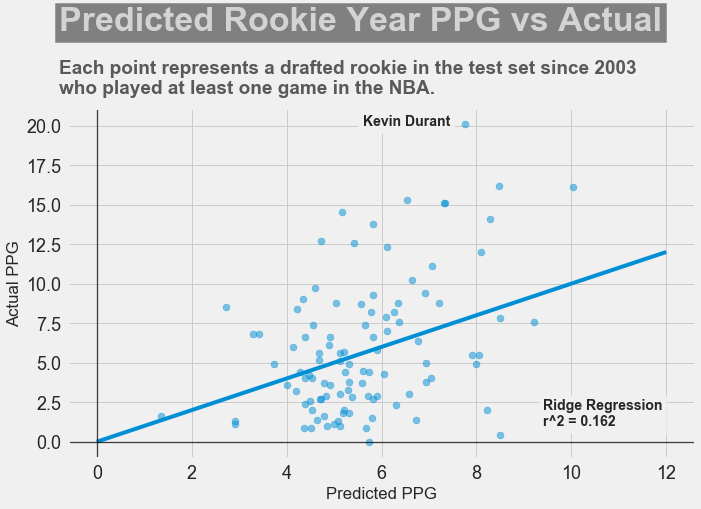

In [604]:
## Plot predicted vs actual 
style.use('fivethirtyeight')
plt.figure(figsize = (10,6))

plt.scatter(lr_test_pred3,y_test,alpha=0.5,)
plt.plot(np.linspace(0,12,1000),np.linspace(0,12,1000))
plt.xlabel('Predicted PPG')
plt.ylabel('Actual PPG')


plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axvline(x = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x = -0.8, y = 26, s = "Predicted Rookie Year PPG vs Actual",
               fontsize = 34, weight = 'bold', alpha = .75,color = '#f0f0f0', backgroundcolor = 'grey')
plt.text(x = -0.8, y = 22, s = "Each point represents a drafted rookie in the test set since 2003\nwho played at least one game in the NBA.",
               fontsize = 19, weight = 'bold', alpha = .75)

plt.text(x = 5.6, y = 20, s = 'Kevin Durant', weight = 'bold', rotation = 0,
             backgroundcolor = '#f0f0f0')
#plt.text(x = -2, y = 5, s = 'James Augustine', weight = 'bold', rotation = 0,
#              backgroundcolor = '#f0f0f0')
plt.text(x = 9.4, y = 1, s = 'Ridge Regression\nr^2 = 0.162', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')

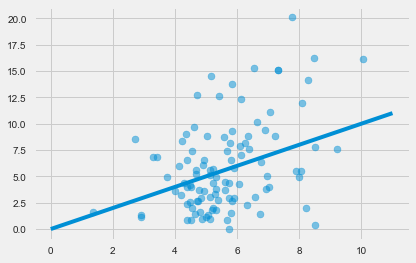

In [548]:
## Plot predicted vs actual 

plt.scatter(lr_test_pred3,y_test,alpha=0.5)
plt.plot(np.linspace(0,11,1000),np.linspace(0,11,1000))

In [549]:
print('RidgeReg MAD: ',np.mean(np.abs(lr_test_pred3 - y_test)))
print('RidgeReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred3)))
print('RidgeReg MSE: ', mean_absolute_error(y_test,lr_test_pred3))
print('RidgeReg r2: ',r2_score(y_test, lr_test_pred3))

RidgeReg MAD:  3.077059835301955
RidgeReg RMSE:  3.87243782989
RidgeReg MSE:  3.0770598353
RidgeReg r2:  0.162097952867


# Regression on Entire Data Set

In [550]:
lr_modelX = Ridge()
lr_modelX.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [551]:
lr_test_predX = lr_modelX.predict(X)

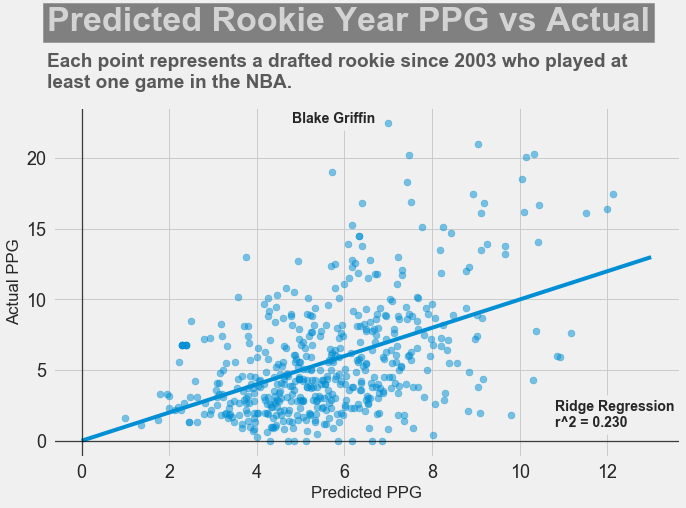

In [600]:
## Plot predicted vs actual 
style.use('fivethirtyeight')
plt.figure(figsize = (10,6))

plt.scatter(lr_test_predX,y,alpha=0.5,)
plt.plot(np.linspace(0,13,1000),np.linspace(0,13,1000))
plt.xlabel('Predicted PPG')
plt.ylabel('Actual PPG')


plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.axvline(x = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

plt.text(x = -0.8, y = 29, s = "Predicted Rookie Year PPG vs Actual",
               fontsize = 34, weight = 'bold', alpha = .75,color = '#f0f0f0', backgroundcolor = 'grey')
plt.text(x = -0.8, y = 25, s = "Each point represents a drafted rookie since 2003 who played at\nleast one game in the NBA.",
               fontsize = 19, weight = 'bold', alpha = .75)

plt.text(x = 4.8, y = 22.5, s = 'Blake Griffin', weight = 'bold', rotation = 0,
             backgroundcolor = '#f0f0f0')
#plt.text(x = -2, y = 5, s = 'James Augustine', weight = 'bold', rotation = 0,
#              backgroundcolor = '#f0f0f0')
plt.text(x = 10.8, y = 1, s = 'Ridge Regression\nr^2 = 0.230', weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')

In [553]:
print('LinReg MAD: ',np.mean(np.abs(lr_test_predX - y)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y, lr_test_predX)))
print('LinReg MSE: ', mean_absolute_error(y,lr_test_predX))
print('LinReg r2: ',r2_score(y, lr_test_predX))

LinReg MAD:  2.7188076359905144
LinReg RMSE:  3.53405620354
LinReg MSE:  2.71880763599
LinReg r2:  0.230018626199


# Elasticnet

In [554]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

Elasticnet


/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Obje

[mean: 0.04231, std: 0.13473, params: {'alpha': 0.0001, 'l1_ratio': 0.0},
 mean: 0.04232, std: 0.13487, params: {'alpha': 0.0001, 'l1_ratio': 0.25},
 mean: 0.04232, std: 0.13502, params: {'alpha': 0.0001, 'l1_ratio': 0.5},
 mean: 0.04232, std: 0.13517, params: {'alpha': 0.0001, 'l1_ratio': 0.75},
 mean: 0.04233, std: 0.13430, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.0},
 mean: 0.04237, std: 0.13447, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.25},
 mean: 0.04239, std: 0.13468, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.5},
 mean: 0.04240, std: 0.13490, params: {'alpha': 0.00016042171611153241, 'l1_ratio': 0.75},
 mean: 0.04228, std: 0.13375, params: {'alpha': 0.00025735127000169099, 'l1_ratio': 0.0},
 mean: 0.04238, std: 0.13394, params: {'alpha': 0.00025735127000169099, 'l1_ratio': 0.25},
 mean: 0.04245, std: 0.13418, params: {'alpha': 0.00025735127000169099, 'l1_ratio': 0.5},
 mean: 0.04251, std: 0.13449, params: {'alpha': 0.0002573512700016909

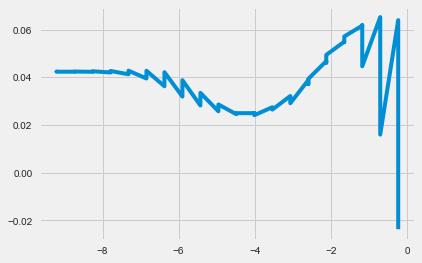

In [555]:
print("Elasticnet")
params = {
    "alpha": np.logspace(-4, -.1, 20),
    "l1_ratio": np.arange(0,1,0.25)
}

grid_est = GridSearchCV(ElasticNet(), param_grid=params, cv=kfold)
grid_est.fit(X_tr, y_train)
df_en = pd.DataFrame(grid_est.grid_scores_)
df_en["alpha"] = df_en.parameters.apply(lambda val: val["alpha"])
plt.plot(np.log(df_en.alpha), df_en.mean_validation_score);
grid_est.grid_scores_

In [556]:
grid_est.best_estimator_

ElasticNet(alpha=0.49515006694731312, copy_X=True, fit_intercept=True,
      l1_ratio=0.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [557]:
lr_model5 = ElasticNet(alpha=0.1, l1_ratio=0)
lr_model5.fit(X_tr,y_train)

/Users/kennyleung/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [613]:
list(zip(X_train.columns,lr_model5.coef_))

[('Total_Height_in', -0.10278799147170127),
 ('Weight', 0.2203717649008258),
 ('Yrs', -0.40073519273685348),
 ('FG_Perc', 0.50503404669438168),
 ('FT_Perc', 0.10411079072283642),
 ('RPG', 0.15925190503882652),
 ('APG', 0.75401903016010963),
 ('SPG', 0.53869062425868708),
 ('BPG', 0.11408361136169901),
 ('PPG', 1.0160174878608375),
 ('Age_x', 0.20676354457680196),
 ('College_PPG', 0.15234726548168803),
 ('PPG_top3', 0.35451832687011819),
 ('PPG_top5', 0.079132791669018432),
 ('PPG_top7', 0.1658704487781382),
 ('PPG_top13', 0.36556740443776914),
 ('top3/top5', 0.43613100911988517),
 ('top3/top7', 0.49463702824457845),
 ('top3/top13', 0.030111308064683248),
 ('top5/top7', 0.3994009197259536),
 ('top5/top13', 0.21746188714183287),
 ('top7/top13', -0.16500329252555573)]

In [559]:
lr_test_pred4 = lr_model5.predict(X_te)

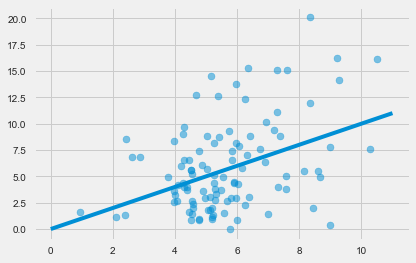

In [560]:
## Plot predicted vs actual 

plt.scatter(lr_test_pred4,y_test,alpha=0.5)
plt.plot(np.linspace(0,11,1000),np.linspace(0,11,1000))

In [561]:
print('ElasReg MAD: ',np.mean(np.abs(lr_test_pred4 - y_test)))
print('ElasReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred4)))
print('ElasReg MSE: ', mean_absolute_error(y_test,lr_test_pred4))
print('ElasReg r2: ',r2_score(y_test, lr_test_pred4))

ElasReg MAD:  3.1068650410565857
ElasReg RMSE:  3.8797458196
ElasReg MSE:  3.10686504106
ElasReg r2:  0.15893242367


# Random Forest

In [562]:
sorted_PPG = df.sort_values(['PTS'], ascending=False)

In [563]:
# top colleges by number of drafted NBA players
list(sorted_PPG.groupby(['College']).count()['PTS'].sort_values(ascending=False).head(10).index)

['University of Kentucky',
 'Duke University',
 'University of California, Los Angeles',
 'University of Kansas',
 'University of North Carolina',
 'University of Arizona',
 'University of Connecticut',
 'University of Texas at Austin',
 'Syracuse University',
 'University of Florida']

In [564]:
df_college = df.groupby(['College']).mean().sort_values(by='PTS',ascending=False)

In [565]:
# top colleges by rookie PPG
good_colleges = ['Duke University',
 'Georgia Institute of Technology',
 'Indiana University',
 'Louisiana State University',
 'Ohio State University',
 'Stanford University',
 'Syracuse University',
 'University of Kentucky',
 'University of Memphis',
 'University of Southern California']

In [566]:
PPG_Rookie = list(df_college.filter(items=good_colleges,axis=0)['PTS'])

In [567]:
colleges_PPG = list(zip(good_colleges,PPG_Rookie))

In [568]:
colleges_PPG.sort(key=lambda x: x[1])

In [569]:
colleges_PPG

[('Duke University', 6.6200000000000001),
 ('Louisiana State University', 6.9874999999999998),
 ('University of Memphis', 7.0777777777777793),
 ('Stanford University', 7.1333333333333329),
 ('Georgia Institute of Technology', 7.1799999999999997),
 ('Ohio State University', 7.4124999999999996),
 ('University of Kentucky', 7.5600000000000023),
 ('Syracuse University', 7.6846153846153848),
 ('University of Southern California', 8.5333333333333332),
 ('Indiana University', 10.74)]

In [570]:
rank1 = [i[0] for i in colleges_PPG]

In [571]:
a = dict(enumerate(rank1,1))

In [572]:
res = dict (zip(a.values(),a.keys()))

In [573]:
res

{'Duke University': 1,
 'Georgia Institute of Technology': 5,
 'Indiana University': 10,
 'Louisiana State University': 2,
 'Ohio State University': 6,
 'Stanford University': 4,
 'Syracuse University': 8,
 'University of Kentucky': 7,
 'University of Memphis': 3,
 'University of Southern California': 9}

In [574]:
def CollegePPG(college):
    '''
    Returns a ranking from 0-10 based on what college the player played for. Player receives a 0 if they did
    not play for the top 10 colleges based on BPM average.
    '''
    if college in good_colleges:
        return res[college]
    else:
        return 0

In [575]:
df['College_PPG'] = df['College'].apply(CollegePPG)

In [576]:
df.columns

Index(['Player', 'Birthday', 'Height_ft', 'Height_in', 'Weight', 'Yrs', 'GP',
       'MPG', 'FGM', 'FGA_x',
       ...
       'PPG_top5', 'PPG_top7', 'PPG_top13', 'top3/top5', 'top3/top7',
       'top3/top13', 'top5/top7', 'top5/top13', 'top7/top13', 'College_PPG'],
      dtype='object', length=114)

In [577]:
feature_columns = ['Total_Height_in',
 'Weight',
 'Yrs',
 'FG_Perc',
 'FT_Perc',
 'RPG',
 'APG',
 'SPG',
 'BPG',
 'PPG',
 'Age_x',
 'College_PPG',
 'PPG_top3',
 'PPG_top5',
 'PPG_top7',
 'PPG_top13',
 'top3/top5',
 'top3/top7', 'top3/top13', 'top5/top7', 'top5/top13', 'top7/top13']

In [578]:
X = df.loc[:,feature_columns]
y = df.loc[:,"PTS"]

In [579]:
X_train, X_test, y_train, y_testrf = train_test_split(X, y, test_size=0.2,random_state=42)

# Forest 1

In [580]:
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=9, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [581]:
rf_test_pred1 = rfmodel1.predict(X_test)

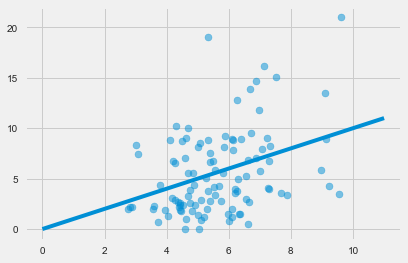

In [582]:
#Plot actual vs predicted

plt.scatter(rf_test_pred1,y_testrf,alpha=.5)
plt.plot(np.linspace(0,11,1000),np.linspace(0,11,1000))

In [583]:
list(zip(X_train.columns,rfmodel1.feature_importances_))

[('Total_Height_in', 0.019736089342787411),
 ('Weight', 0.026849469914518167),
 ('Yrs', 0.012377595770031318),
 ('FG_Perc', 0.040349616728754048),
 ('FT_Perc', 0.039595016435732523),
 ('RPG', 0.062218441222242564),
 ('APG', 0.049781268405553435),
 ('SPG', 0.051538357739740311),
 ('BPG', 0.034512892354301591),
 ('PPG', 0.132135533687881),
 ('Age_x', 0.076700954173855959),
 ('College_PPG', 0.060339884991613343),
 ('PPG_top3', 0.034295537417477741),
 ('PPG_top5', 0.032019188936601529),
 ('PPG_top7', 0.027798124645609351),
 ('PPG_top13', 0.042264173378772606),
 ('top3/top5', 0.027511572123150665),
 ('top3/top7', 0.029737254020336432),
 ('top3/top13', 0.034707947498671295),
 ('top5/top7', 0.0318196720844987),
 ('top5/top13', 0.055263666056799839),
 ('top7/top13', 0.078447743071070178)]

In [584]:
print('RandomForest1 MAD: ',np.mean(np.abs(rf_test_pred1 - y_testrf)))
print('RandomForest1 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred1)))
print('RandomForest1 MSE: ', mean_absolute_error(y_testrf,rf_test_pred1))
print('RandomForest1 r2: ',r2_score(y_testrf, rf_test_pred1))

RandomForest1 MAD:  3.068863036130999
RandomForest1 RMSE:  3.82418387153
RandomForest1 MSE:  3.06886303613
RandomForest1 r2:  0.140790249668


# Forest 2

In [585]:
rfmodel2 = RandomForestRegressor(n_estimators = 1000, min_samples_leaf=1, max_features=9, n_jobs=-1)
rfmodel2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [586]:
rf_test_pred2 = rfmodel2.predict(X_test)

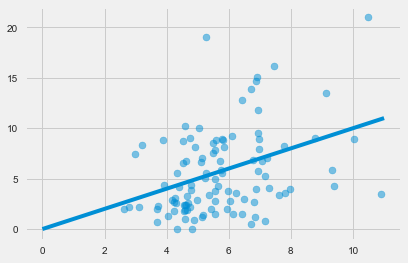

In [587]:
#Plot actual vs predicted

plt.scatter(rf_test_pred2,y_testrf,alpha=.5)
plt.plot(np.linspace(0,11,1000),np.linspace(0,11,1000))

In [588]:
list(zip(X_train.columns,rfmodel2.feature_importances_))

[('Total_Height_in', 0.027129827517952128),
 ('Weight', 0.031357064648769209),
 ('Yrs', 0.012456748839653134),
 ('FG_Perc', 0.052751292922932715),
 ('FT_Perc', 0.049692614723643176),
 ('RPG', 0.062120892905500359),
 ('APG', 0.049716466853922101),
 ('SPG', 0.05643123657989043),
 ('BPG', 0.037479927123520183),
 ('PPG', 0.11411281708287244),
 ('Age_x', 0.058518133986568674),
 ('College_PPG', 0.052339844948893717),
 ('PPG_top3', 0.035209500360367775),
 ('PPG_top5', 0.031578672190395604),
 ('PPG_top7', 0.032805211127458683),
 ('PPG_top13', 0.047474132435761887),
 ('top3/top5', 0.030992412064632782),
 ('top3/top7', 0.029867496048000056),
 ('top3/top13', 0.036005198606783681),
 ('top5/top7', 0.038278448970520927),
 ('top5/top13', 0.050340901461120767),
 ('top7/top13', 0.063341158600839095)]

In [589]:
print('RandomForest2 MAD: ',np.mean(np.abs(rf_test_pred2 - y_testrf)))
print('RandomForest2 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred2)))
print('RandomForest2 MSE: ', mean_absolute_error(y_testrf,rf_test_pred2))
print('RandomForest2 r2: ',r2_score(y_testrf, rf_test_pred2))

RandomForest2 MAD:  3.053213461538464
RandomForest2 RMSE:  3.83461289449
RandomForest2 MSE:  3.05321346154
RandomForest2 r2:  0.136097516783


# Forest 3

In [590]:
rfmodel3 = RandomForestRegressor(n_estimators = 600, min_samples_leaf=1, max_features='sqrt', n_jobs=-1)
rfmodel3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [591]:
rf_test_pred3 = rfmodel3.predict(X_test)

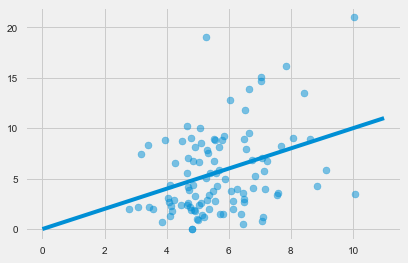

In [592]:
#Plot actual vs predicted

plt.scatter(rf_test_pred3,y_testrf,alpha=.5)
plt.plot(np.linspace(0,11,1000),np.linspace(0,11,1000))

In [593]:
list(zip(X_train.columns,rfmodel3.feature_importances_))

[('Total_Height_in', 0.030770892989347817),
 ('Weight', 0.034568876445073421),
 ('Yrs', 0.017070769484401834),
 ('FG_Perc', 0.050531054478827962),
 ('FT_Perc', 0.047211306750661271),
 ('RPG', 0.058293034069768754),
 ('APG', 0.046688575148654488),
 ('SPG', 0.054704457677720426),
 ('BPG', 0.039194743726582756),
 ('PPG', 0.09011592099713496),
 ('Age_x', 0.0531555262270774),
 ('College_PPG', 0.044003289222391093),
 ('PPG_top3', 0.039078690734597715),
 ('PPG_top5', 0.037121076394133437),
 ('PPG_top7', 0.03780709612592905),
 ('PPG_top13', 0.048925467170437553),
 ('top3/top5', 0.035092503263084017),
 ('top3/top7', 0.037992912597467648),
 ('top3/top13', 0.044061575672038826),
 ('top5/top7', 0.041626910338174374),
 ('top5/top13', 0.051831635325767601),
 ('top7/top13', 0.060153685160727832)]

In [594]:
print('RandomForest3 MAD: ',np.mean(np.abs(rf_test_pred3 - y_testrf)))
print('RandomForest3 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred3)))
print('RandomForest3 MSE: ', mean_absolute_error(y_testrf,rf_test_pred3))
print('RandomForest3 r2: ',r2_score(y_testrf, rf_test_pred3))

RandomForest3 MAD:  3.097278846153844
RandomForest3 RMSE:  3.8516452127
RandomForest3 MSE:  3.09727884615
RandomForest3 r2:  0.128406028331


# Gradient Boosted Trees

In [606]:
gbmodel1 = GradientBoostingRegressor(n_estimators = 1000, learning_rate = .01, max_depth = 1)

In [607]:
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=1, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [608]:
pred_vals_gb1 = gbmodel1.predict(X_test)

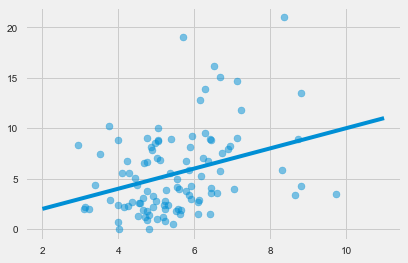

In [610]:
#Plot actual vs predicted

plt.scatter(pred_vals_gb1,y_testrf,alpha=.5)
plt.plot(np.linspace(2,11,1000),np.linspace(2,11,1000))

In [611]:
print('GradBoost MAD: ',np.mean(np.abs(pred_vals_gb1 - y_testrf)))
print('GradBoost RMSE: ',np.sqrt(mean_squared_error(y_testrf, pred_vals_gb1)))
print('GradBoost MSE: ', mean_absolute_error(y_testrf,pred_vals_gb1))
print('GradBoost r2: ',r2_score(y_testrf, pred_vals_gb1))

GradBoost MAD:  3.0966903663538754
GradBoost RMSE:  3.85125930757
GradBoost MSE:  3.09669036635
GradBoost r2:  0.128580673564


# Results

In [612]:
print('LinReg MAD: ',np.mean(np.abs(lr_test_pred1 - y_test)))
print('LinReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred1)))
print('LinReg MSE: ', mean_absolute_error(y_test,lr_test_pred1))
print('LinReg r2: ',r2_score(y_test, lr_test_pred1))
print('\n')
print('LassoReg MAD: ',np.mean(np.abs(lr_test_pred2 - y_test)))
print('LassoReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred2)))
print('LassoReg MSE: ', mean_absolute_error(y_test,lr_test_pred2))
print('LassoReg r2: ',r2_score(y_test, lr_test_pred2))
print('\n')
print('RidgeReg MAD: ',np.mean(np.abs(lr_test_pred3 - y_test)))
print('RidgeReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred3)))
print('RidgeReg MSE: ', mean_absolute_error(y_test,lr_test_pred3))
print('RidgeReg r2: ',r2_score(y_test, lr_test_pred3))
print('\n')
print('ElasReg MAD: ',np.mean(np.abs(lr_test_pred4 - y_test)))
print('ElasReg RMSE: ',np.sqrt(mean_squared_error(y_test, lr_test_pred4)))
print('ElasReg MSE: ', mean_absolute_error(y_test,lr_test_pred4))
print('ElasReg r2: ',r2_score(y_test, lr_test_pred4))
print('\n')
print('RandomForest1 MAD: ',np.mean(np.abs(rf_test_pred1 - y_testrf)))
print('RandomForest1 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred1)))
print('RandomForest1 MSE: ', mean_absolute_error(y_testrf,rf_test_pred1))
print('RandomForest1 r2: ',r2_score(y_testrf, rf_test_pred1))
print('\n')
print('RandomForest2 MAD: ',np.mean(np.abs(rf_test_pred2 - y_testrf)))
print('RandomForest2 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred2)))
print('RandomForest2 MSE: ', mean_absolute_error(y_testrf,rf_test_pred2))
print('RandomForest2 r2: ',r2_score(y_testrf, rf_test_pred2))
print('\n')
print('RandomForest3 MAD: ',np.mean(np.abs(rf_test_pred3 - y_testrf)))
print('RandomForest3 RMSE: ',np.sqrt(mean_squared_error(y_testrf, rf_test_pred3)))
print('RandomForest3 MSE: ', mean_absolute_error(y_testrf,rf_test_pred3))
print('RandomForest3 r2: ',r2_score(y_testrf, rf_test_pred3))
print('\n')
print('GradBoost MAD: ',np.mean(np.abs(pred_vals_gb1 - y_testrf)))
print('GradBoost RMSE: ',np.sqrt(mean_squared_error(y_testrf, pred_vals_gb1)))
print('GradBoost MSE: ', mean_absolute_error(y_testrf,pred_vals_gb1))
print('GradBoost r2: ',r2_score(y_testrf, pred_vals_gb1))

LinReg MAD:  3.2521702580196843
LinReg RMSE:  4.02173875643
LinReg MSE:  3.25217025802
LinReg r2:  0.0962422054315


LassoReg MAD:  3.1024060888752087
LassoReg RMSE:  3.88804133701
LassoReg MSE:  3.10240608888
LassoReg r2:  0.155331904406


RidgeReg MAD:  3.077059835301955
RidgeReg RMSE:  3.87243782989
RidgeReg MSE:  3.0770598353
RidgeReg r2:  0.162097952867


ElasReg MAD:  3.1068650410565857
ElasReg RMSE:  3.8797458196
ElasReg MSE:  3.10686504106
ElasReg r2:  0.15893242367


RandomForest1 MAD:  3.068863036130999
RandomForest1 RMSE:  3.82418387153
RandomForest1 MSE:  3.06886303613
RandomForest1 r2:  0.140790249668


RandomForest2 MAD:  3.053213461538464
RandomForest2 RMSE:  3.83461289449
RandomForest2 MSE:  3.05321346154
RandomForest2 r2:  0.136097516783


RandomForest3 MAD:  3.097278846153844
RandomForest3 RMSE:  3.8516452127
RandomForest3 MSE:  3.09727884615
RandomForest3 r2:  0.128406028331


GradBoost MAD:  3.0966903663538754
GradBoost RMSE:  3.85125930757
GradBoost MSE:  3.0966903

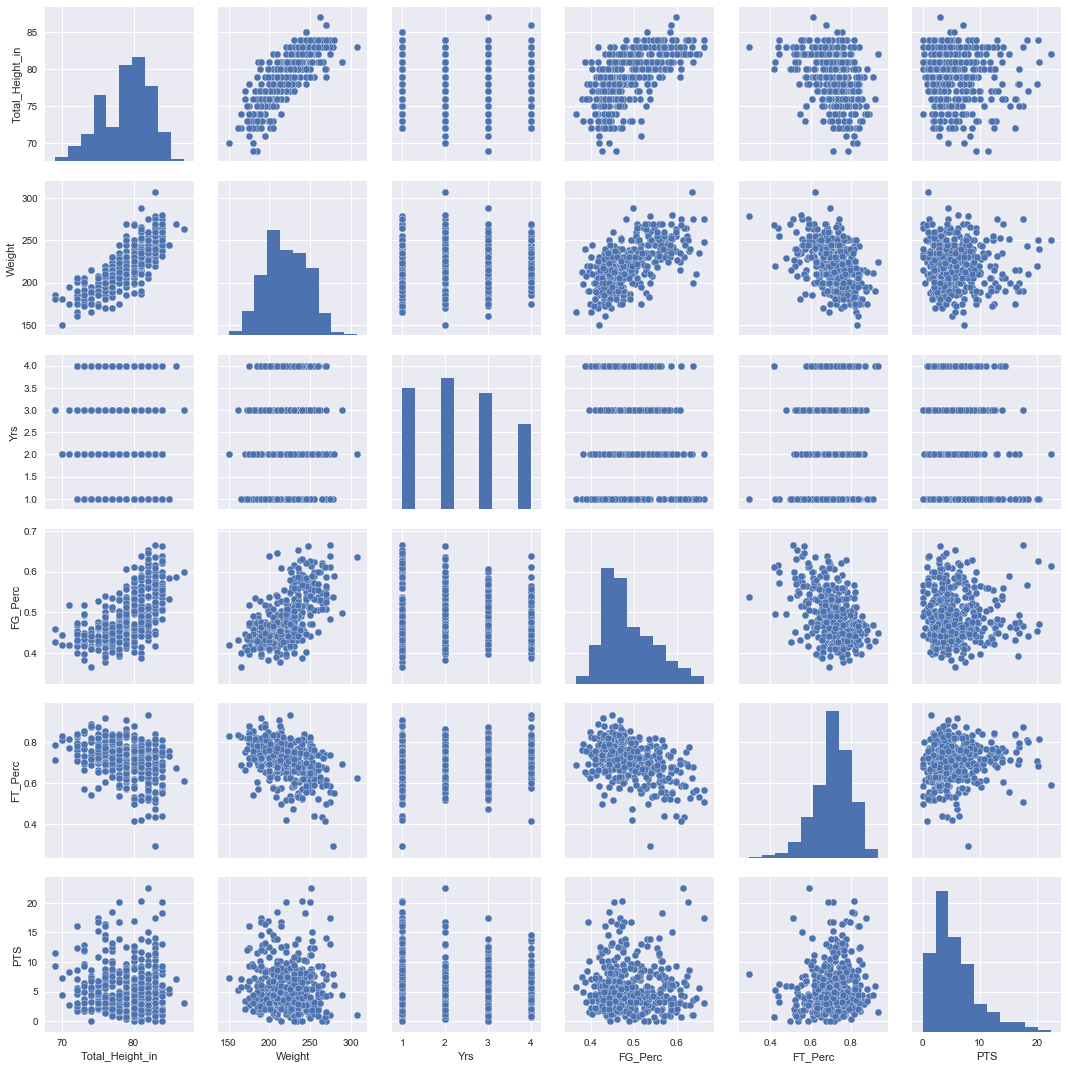

In [347]:
sns.pairplot(pd.concat([X_train.iloc[:,0:5], y_train], axis=1))